In [1]:
from nltk.tokenize import *
from nltk.data import load
from nltk.probability import *

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
import pymorphy
from pymorphy import get_morph
import re
morph = get_morph('./')

In [5]:
token = []
def append(text_name, token):
    text = open(text_name)
    for s in text.readlines():
        s = re.sub(u"[.\n\t,_;:?!()\"\-\s1-9]", " ", s)
        s = re.sub(r'\s+', ' ', s)
        token.extend(word_tokenize(s))

In [6]:
def get_top(filename, num):
    name = []
    append(filename, name)
    name = process(name)
    c = Counter(name)
    for item in c.most_common(num):
        print item[0], item[1]
    return c
def get_top_without_norm(filename, num):
    name = []
    append(filename, name)
    name = process_without_norm(name)
    c = Counter(name)
    for item in c.most_common(num):
        print item[0], item[1]
    return c

In [7]:
def process(token):
    d = []
    for word in token:
        words = morph.normalize(word.decode('utf-8').upper())
        d.append(list(words)[0])
    return d
def process_without_norm(token):
    d = []
    for word in token:
        d.append(word.decode('utf-8').upper())
    return d

In [8]:
def most_com(num, counter):
    for item in counter.most_common(num):
        print item[0], item[1]

In [9]:
def get_plot(dictionary, limx = 1000, limy = 1000, const = 1):
    arr = np.array(list(dictionary.values()))
    arr= -np.sort(-arr)

    X = range(len(arr)) 
    Y = [arr[0]/(x + 0.1) * const for x in X]

    plt.xlim(0, limx)
    plt.ylim(0, limy)
    plt.plot(X,Y)
    plt.plot(X, arr)

In [10]:
names = [u'Трудно быть богом.txt',u'Понедельник начинается в субботу.txt', u'Путь на Амальтею.txt',
        u'Улитка на склоне.txt', u'Обитаемый остров.txt', u'Сказка о тройке.txt', u'Волны гасят ветер.txt',
        u'Стажеры.txt', u'Попытка к бегству.txt', u'Пикник на обочине.txt']

In [11]:
words = []
for name in names:
    append(name, words)

In [12]:
d = []
count = 0
for word in words:
    count += 1
    lemmas = morph.normalize(word.decode('utf-8').upper())
    d.append(list(lemmas)[0])

In [13]:
forms = []
for word in words:
    forms.append(word.decode('utf-8').upper())

In [14]:
def get_ngrams(n, words):
    ngrams = []
    for word in words:
        word = word.decode('utf-8').upper()
        for i in range(0, len(word)-n):
            ngrams.append(word[i:i+n])
    return ngrams

In [15]:
def print_most_common(count, name):
    res = open(name, 'wb+')
    for item in count.most_common(1000):
        #print item[0], item[1]
        s = item[0]
        res.write(s.encode('utf-8'))
        res.write('\t' + str(item[1]) + '\n')
    res.close()

In [16]:
from collections import Counter
global_dict = Counter(d)
forms = Counter(forms)

In [17]:
digrams = Counter(get_ngrams(2, words))
trigrams = Counter(get_ngrams(3, words))
fourgrams = Counter(get_ngrams(4, words))

In [18]:
print u"Объем корпуса: ", count, u" слов"

Объем корпуса:  503223  слов


In [19]:
len(global_dict.items())

25782

In [20]:
len(forms)

65911

In [21]:
def get_info(names, folderpath):
    words = []
    for name in names:
        append(name, words)
    print len(words)
    
    lemma_dict = []
    for word in words:
        lemmas = morph.normalize(word.decode('utf-8').upper())
        lemma_dict.append(list(lemmas)[0])
    print len(lemma_dict)
    
    forms = [word.decode('utf-8').upper() for word in words]
    print len(forms)
    
    digrams = Counter(get_ngrams(2, words))
    trigrams = Counter(get_ngrams(3, words))
    fourgrams = Counter(get_ngrams(4, words))
    global_dict = Counter(lemma_dict)
    forms = Counter(forms)
    print "final"
    
    print_most_common(global_dict, folderpath + "/lemmas.txt")
    print_most_common(forms, folderpath + "/forms.txt")
    print_most_common(digrams, folderpath + "/2gramms.txt")
    print_most_common(trigrams, folderpath + "/3gramms.txt")
    print_most_common(fourgrams, folderpath + "/4gramms.txt")

In [130]:
kra = open("./Крапивин.txt")

In [127]:
get_info(names, ".")

503223
503223
503223
final
И 19626
В 11114
НЕ 10624
Я 8344
НА 8126
ЧТО 7931
ОН 7692
СКАЗАТЬ 5766
ОНО 5751
С 5164
ЭТО 5149
А 5073
ВЕСЬ 4683
ТОТ 4275
БЫТЬ 3803
КАК 3402
ВЫ 3197
ОНИ 3180
ТЫ 3020
ПО 2715
МЫ 2699
У 2668
К 2647
НО 2484
ЗА 2361
БЫЛО 2154
ЖЕ 1950
ИЗ 1941
ТАК 1787
ЧЕЛОВЕК 1701
ЭТОТ 1617
БЫ 1605
ОТ 1604
ЕЩЕ 1495
МЕНЬ 1481
ЗНАТЬ 1453
ВОТ 1401
ТОЛЬКО 1352
ДА 1352
СВОЙ 1323
ОНА 1298
ОДИН 1273
КАКОЙ 1257
О 1207
РУКА 1180
НЕТ 1176
УЖЕ 1170
ГОВОРИТЬ 1146
ТАКОЙ 1101
КОТОРЫЙ 1023
МАКСИМ 1018
КТО 1014
НУ 1012
ОЧЕНЬ 1001
ГЛАЗ 976
ВРЕМЯ 970
ЗДЕСЬ 963
ТАМ 939
СПРОСИТЬ 938
КОГДА 916
МОЧЬ 898
ДО 896
ПОТ 887
МОЖЕТ 853
НИЧЕГО 849
МОЙ 844
ЕСТЬ 840
ДЕЛО 833
НИ 827
СТАТЬ 827
ЕСЛИ 815
СЕБЯ 810
ПОД 791
ДАЖЕ 774
СЕЙЧАС 772
ГДЕ 754
ГОЛОВ 750
САМЫЙ 739
ВИДЕТЬ 738
ДЛЯ 720
ТОЖЕ 702
НАДО 700
ИЛИ 700
РУМАТ 699
ХОРОШИЙ 684
ХОТЕТЬ 683
ЛИЦО 679
ДВА 671
ЧТОБЫ 669
НОГА 650
ИДТИ 643
БЫЛЬ 640
РАЗ 623
СМОТРЕТЬ 614
ПОДУМАТЬ 598
НИБЫТЬ 597
НАШ 596
ПОЙТИ 594
ВДРУГ 589
ЮР 583
САМ 583
ДРУГОЙ 581
ДОН 579
ТЕПЕРЬ 578
ДУМА

ОТВЕТИЛ 197
ЛАВР 196
ФЕДОТОВИЧ 196
ТОВАРИЩ 195
ГОВОРИТ 193
ЭТУ 193
КАЖЕТСЯ 191
ДРУГОЙ 191
ФАРФУРКИС 191
ЭТИХ 189
ЗАТЕМ 189
КОГО 188
ВРЕМЕНИ 188
РОТМИСТР 187
СТАЛО 186
ЛЕС 184
СВОЕЙ 184
ВСЕМ 184
ОТКУДА 184
ИМЕННО 183
ДАЛЬШЕ 183
ПОНИМАЮ 182
ЛАДНО 181
КОМЕНДАНТ 180
СТОЛ 179
ПОДНЯЛСЯ 179
ДАВНО 179
ТЕМ 179
ПРАВДА 174
ВИДНО 173
СИДЕЛ 172
ЕЙ 171
ОДНАКО 171
ОСТАНОВИЛСЯ 171
НУНАН 170
МЕСТО 169
ВИТЬКА 168
СКОЛЬКО 166
ПОЧТИ 165
НЕКОТОРОЕ 165
КАЖДЫЙ 165
РУКАМИ 164
СВОЙ 164
ХОТЕЛ 162
ДВАДЦАТЬ 162
ЛИБО 162
ЖИЗНИ 161
КРОМЕ 160
ХОЧУ 160
ВПРОЧЕМ 159
ГЛЯДЯ 158
ЗНАЕШЬ 158
ПЯТЬ 158
МАССАРАКШ 157
СНАЧАЛА 155
СВОЮ 155
СЛИШКОМ 154
РАВНО 154
ПОДНЯЛ 154
ЖИЗНЬ 153
ТИХО 152
СЛОВА 152
ЗНАЕТ 151
СТОРОНУ 151
ТАКИЕ 150
ЗНАЕТЕ 150
ДЕЙСТВИТЕЛЬНО 149
МЕСТЕ 148
НАПРИМЕР 147
ВСЮ 147
ГОВОРИТЬ 146
ВПЕРЕД 146
ОНО 145
БУДУ 144
РУКОЙ 144
БУДТО 144
РЭБА 143
ДВЕ 143
КАКОЕ 142
ОДНО 141
ВЫШЕЛ 141
МИР 139
ВЕРНУЛСЯ 139
ПОДОШЕЛ 139
БУДЕМ 139
САМОМ 137
ОДНОГО 136
ГОДА 135
КОНЦЕ 135
НЕМ 135
ХОТЬ 135
МАШИНЫ 134
ВЫБЕГАЛЛО 134
ОДНОЙ 133


ХЪ 4
ND 4
DE 4
НМ 4
НЭ 4
IR 4
OO 4
OM 4
ШЧ 4
HE 4
ЛЭ 4
UR 4
TI 4
TA 4
NE 4
WA 3
ГЗ 3
AT 3
SP 3
SU 3
ХХ 3
ЮО 3
KE 3
ЗЭ 3
ХI 3
WI 3
НЪ 3
ЦЗ 3
VI 3
TT 3
BE 3
ES 3
ШС 3
OP 3
HO 3
AS 3
GL 3
TO 3
AK 3
AM 3
КЧ 3
WE 2
НП 2
GA 2
ЭЧ 2
IC 2
GR 2
EE 2
EC 2
ЦЛ 2
MP 2
ЙА 2
SI 2
SO 2
GE 2
ГХ 2
ХЧ 2
RR 2
ЕЭ 2
ФЬ 2
XX 2
NS 2
KN 2
ЯУ 2
ЗЮ 2
EU 2
ET 2
ВЮ 2
Р/ 2
PI 2
PO 2
XI 2
PR 2
ME 2
ЦД 2
DA 2
RI 2
ЦМ 2
IO 2
ТЖ 2
BO 2
'К 2
BU 2
IM 2
ШШ 2
OL 2
ХV 2
OS 2
OT 2
US 2
О' 2
ЧХ 2
CO 2
AG 2
AL 2
КЬ 2
КФ 2
ЮЮ 2
ЮЯ 1
ЭЭ 1
EO 1
EI 1
EK 1
ЮФ 1
OI 1
JA 1
SH 1
EG 1
ФЯ 1
ZN 1
ZI 1
М/ 1
ЦП 1
AV 1
UZ 1
ЙП 1
FO 1
ЙЫ 1
ЙХ 1
NI 1
C' 1
SE 1
ВЖ 1
ПХ 1
ПФ 1
О/ 1
LO 1
/С 1
ЬЭ 1
ХЫ 1
ЭО 1
RP 1
RZ 1
ХЗ 1
ЭЯ 1
L' 1
DU 1
ЮА 1
БП 1
NC 1
Д' 1
ЭЕ 1
II 1
ФЭ 1
ФЦ 1
ФЧ 1
XV 1
MB 1
KA 1
KI 1
KO 1
DL 1
00 1
АЫ 1
PL 1
УЫ 1
PP 1
PU 1
ЖВ 1
ЖТ 1
ЖЦ 1
DO 1
RF 1
RG 1
RA 1
CK 1
RL 1
RN 1
CU 1
CT 1
WR 1
ЭЦ 1
ЮЙ 1
МЩ 1
MK 1
'А 1
BA 1
TR 1
BR 1
RD 1
OF 1
ШБ 1
OG 1
OY 1
NK 1
ЛР 1
ЫЭ 1
ЮЭ 1
AP 1
UM 1
UL 1
UD 1
UA 1
UC 1
AW 1
FE 1
ЧЯ 1
ЧЭ 1
TZ 1
TU 1


АТОР 394
МЫСЛ 393
АВТО 392
ИЗВЕ 391
ПРОБ 391
НЕНИ 391
АСТО 390
РОДО 390
ВИТЕ 390
ДОБР 388
КАЖЕ 387
ННОГ 387
ЛЕДН 386
БОТА 384
СПОД 382
РАЗО 381
ВОДО 381
ВАНН 380
РАЗИ 378
ЕРШЕ 378
ЕМНО 378
РШЕН 375
ДЛЕН 375
ВЕЛИ 375
ОВСЕ 374
НЕКО 374
СДЕЛ 374
ЕЙСТ 374
УВИД 374
СОВС 374
ГОСП 374
ЕДЛЕ 373
ПРОГ 373
ЛОВО 372
БОЛЕ 372
ХОТЕ 371
ЗАТЕ 371
ДЫВА 370
СЕГД 369
ВОВА 369
ОСОБ 368
КАЖД 368
РАТИ 367
ИВШИ 366
НЕПР 365
ТОВИ 365
ПРЯМ 365
СТАТ 365
АЖЕН 365
ОНЯТ 364
ИЛАС 363
ТВОВ 363
РЭДР 362
РАВН 362
ЭДРИ 362
РАСН 361
РИМЕ 361
РИСТ 361
НСТВ 361
ПОМО 360
ОВЕК 360
ОЛУЧ 360
КОМЕ 360
РАЗГ 360
ТИЧЕ 359
ЩЕНИ 358
ЛОВН 357
ОЖЕН 357
СТЕН 356
ЛЮДЕ 355
СТЕР 354
ПРИМ 353
ОТКР 353
ОГОВ 353
ЖИЗН 353
ЗВЕС 352
ХЛЕБ 351
КОЛЕ 350
СКОГ 350
КРЫТ 350
ГОДН 348
МЕНТ 348
ЫСТР 348
ЧУВС 347
АКОМ 347
УВСТ 347
АЗАТ 346
СПРА 346
РУКА 346
ОДИЛ 345
ПРИД 345
ТЕЛЕ 345
ИДЕТ 345
ПАЛЬ 342
ИВАЕ 342
ЖЕНН 341
ЕРВЫ 340
ЗНАК 340
КОСТ 339
РОТИ 338
РЕНН 338
КАЗЫ 338
ТОЧН 338
ЕБОВ 338
НУЖН 337
ВОРО 337
МЕЖД 337
ЕЛАТ 335
ЕДОВ 335
ПЛАН 335
ИМАЕ 334
Ф

# Всё вместе

In [107]:
print_most_common(global_dict, "./lemmas.txt")

И 19626
В 11114
НЕ 10624
Я 8344
НА 8126
ЧТО 7931
ОН 7692
СКАЗАТЬ 5766
ОНО 5751
С 5164
ЭТО 5149
А 5073
ВЕСЬ 4683
ТОТ 4275
БЫТЬ 3803
КАК 3402
ВЫ 3197
ОНИ 3180
ТЫ 3020
ПО 2715
МЫ 2699
У 2668
К 2647
НО 2484
ЗА 2361
БЫЛО 2154
ЖЕ 1950
ИЗ 1941
ТАК 1787
ЧЕЛОВЕК 1701
ЭТОТ 1617
БЫ 1605
ОТ 1604
ЕЩЕ 1495
МЕНЬ 1481
ЗНАТЬ 1453
ВОТ 1401
ТОЛЬКО 1352
ДА 1352
СВОЙ 1323
ОНА 1298
ОДИН 1273
КАКОЙ 1257
О 1207
РУКА 1180
НЕТ 1176
УЖЕ 1170
ГОВОРИТЬ 1146
ТАКОЙ 1101
КОТОРЫЙ 1023
МАКСИМ 1018
КТО 1014
НУ 1012
ОЧЕНЬ 1001
ГЛАЗ 976
ВРЕМЯ 970
ЗДЕСЬ 963
ТАМ 939
СПРОСИТЬ 938
КОГДА 916
МОЧЬ 898
ДО 896
ПОТ 887
МОЖЕТ 853
НИЧЕГО 849
МОЙ 844
ЕСТЬ 840
ДЕЛО 833
НИ 827
СТАТЬ 827
ЕСЛИ 815
СЕБЯ 810
ПОД 791
ДАЖЕ 774
СЕЙЧАС 772
ГДЕ 754
ГОЛОВ 750
САМЫЙ 739
ВИДЕТЬ 738
ДЛЯ 720
ТОЖЕ 702
НАДО 700
ИЛИ 700
РУМАТ 699
ХОРОШИЙ 684
ХОТЕТЬ 683
ЛИЦО 679
ДВА 671
ЧТОБЫ 669
НОГА 650
ИДТИ 643
БЫЛЬ 640
РАЗ 623
СМОТРЕТЬ 614
ПОДУМАТЬ 598
НИБЫТЬ 597
НАШ 596
ПОЙТИ 594
ВДРУГ 589
ЮР 583
САМ 583
ДРУГОЙ 581
ДОН 579
ТЕПЕРЬ 578
ДУМАТЬ 576
ЮРКОВСКИЙ 574
ТОГДА 

In [118]:
print_most_common(forms, "./forms.txt")

И 19626
В 11108
НЕ 10624
НА 8126
ОН 7690
ЧТО 6964
Я 6681
С 5145
А 5073
СКАЗАЛ 4941
ЭТО 4028
КАК 3402
ВСЕ 3274
ТО 3236
ПО 2715
У 2668
К 2529
НО 2484
ЕГО 2463
ЗА 2361
БЫЛО 2154
ЖЕ 1950
ИЗ 1941
ТЫ 1873
ВЫ 1829
ТАК 1787
ОНИ 1754
БЫ 1605
ОТ 1604
МЫ 1536
МНЕ 1501
ЕЩЕ 1495
МЕНЯ 1479
ВОТ 1401
ТОЛЬКО 1352
ДА 1352
БЫЛ 1294
О 1207
НЕТ 1176
УЖЕ 1170
НЕГО 1108
ЕМУ 1080
НУ 1012
ОЧЕНЬ 1001
ОНА 998
ЗДЕСЬ 963
ТАМ 939
КОГДА 916
ДО 896
ПОТОМ 854
МОЖЕТ 853
НИЧЕГО 849
БЫТЬ 840
НИ 827
ЕСЛИ 815
МАКСИМ 802
СПРОСИЛ 794
ИХ 793
ПОД 791
ЕСТЬ 774
ДАЖЕ 774
СЕЙЧАС 772
КТО 760
ГДЕ 754
ДЛЯ 720
ВРЕМЯ 712
ТОЖЕ 702
НАДО 700
ИЛИ 700
ВАС 670
ЧТОБЫ 669
НАС 661
БЫЛИ 640
РУМАТА 614
НИБУДЬ 597
ВДРУГ 589
ЧЕЛОВЕК 582
ТЕПЕРЬ 578
ВАМ 574
ТОГДА 573
ЧЕМ 567
СЕБЯ 563
ЕЕ 563
ПОЧЕМУ 553
РАЗ 552
БУДЕТ 552
СНОВА 551
ТЕБЯ 550
ВЕДЬ 549
ВО 539
СЕБЕ 537
СО 535
ТУТ 532
ОДИН 528
БЫЛА 526
ЛИ 512
БЕЗ 511
ЧЕРЕЗ 508
НИХ 499
ЮРКОВСКИЙ 498
ПОДУМАЛ 495
ГЛАЗА 495
ЭТОГО 490
ТЕБЕ 478
ДЕЛО 469
НАД 465
ЗНАЮ 465
ЮРА 461
ПОТОМУ 459
АНТОН 453
ПРОСТО 447
КАКО

In [110]:
print_most_common(digrams, "./digrams.txt")

СТ 30645
ПО 26516
РО 22642
ТО 22317
РА 22070
КА 21130
КО 21097
ПР 19492
ЕН 19043
ОВ 18836
ЕР 18078
НИ 17970
НА 17607
РЕ 17201
ОС 17005
ОЛ 16957
ЗА 16556
ОР 16363
ТА 15766
ВО 15754
НО 15656
ВА 15537
АЛ 15510
ОТ 15384
НЕ 15288
СК 14276
АТ 14065
ВЕ 13569
ЕЛ 13496
РИ 13395
ОД 13188
ЕС 12981
АЗ 12925
ДЕ 12794
ЛО 12720
ОГ 12269
ЛЕ 12154
АН 12131
ТЕ 12010
ОН 11626
ЧЕ 11433
МЕ 10849
МО 10767
МА 10629
ЛЬ 10354
ДО 10296
ТР 9833
ЛИ 9779
ОБ 9771
ИТ 9429
ВИ 9406
ЛА 9330
ИН 9284
ГО 9274
НЫ 9273
ЕТ 8836
АС 8783
ИЛ 8728
АВ 8540
АК 8437
ИС 8281
ВС 8234
ЕГ 8233
ЧТ 8097
НН 8089
РУ 8014
АР 8011
ОМ 7977
СЕ 7727
ЕД 7459
ТИ 7458
БЫ 7346
НУ 7300
ДИ 7230
СЛ 7160
ДА 7104
СО 7097
ЭТ 7085
БО 7058
ЕМ 7039
ПЕ 6779
АМ 6686
ИВ 6461
АД 6458
ВЫ 6311
СП 6155
ОЖ 6008
СИ 5951
ТВ 5943
ЛС 5924
ОЧ 5831
КИ 5810
ЧА 5641
ХО 5616
ИК 5511
УД 5372
ИМ 5320
КР 5317
ОК 5197
ДН 5099
ЖЕ 5084
ПА 4961
ИД 4802
ЗН 4771
ОП 4706
МН 4637
ЧИ 4637
ШЕ 4552
БЕ 4549
ГЛ 4360
ЫЛ 4279
ЬН 4187
УМ 4145
СА 4060
ЖИ 4058
ШИ 4018
АЕ 4011
ТС 3978
ИЗ 3977
ГА

In [111]:
print_most_common(trigrams, "./trigrams.txt")

ПРО 8232
СКА 7382
АЗА 7113
КАЗ 7046
ОСТ 6426
СТА 5785
ПРИ 5214
ЕРЕ 5121
ЕНН 5076
ОРО 5060
ЕСТ 4735
ПЕР 4383
ЕНИ 4383
ВЕР 4330
СТО 4260
ЛЬН 4181
ОТО 4167
ОЛЬ 4107
ТОР 4078
ОЛО 4034
ПОД 4032
СТВ 3922
ОВО 3826
РАЗ 3792
МЕН 3747
СТР 3743
ТЕЛ 3702
ЛОВ 3586
ОВА 3436
РОС 3403
БЫЛ 3375
ОВЕ 3266
ПОЛ 3179
ЛЕН 2995
НОГ 2987
ЗНА 2913
СКО 2873
ПОС 2851
ЕЛЬ 2836
ОДН 2821
АКО 2786
ИВА 2785
ДЕЛ 2783
РАС 2773
ТОЛ 2759
ННЫ 2755
ВОР 2729
ПРЕ 2662
ОЧЕ 2612
НИК 2577
НОВ 2566
ТРЕ 2547
ВАЛ 2518
ОДИ 2508
АНИ 2499
ВАТ 2430
РЕД 2427
ОРИ 2423
УМА 2396
ЫВА 2387
РАВ 2385
КОГ 2372
ИСТ 2360
ТРА 2344
ЛОС 2316
АЛЬ 2315
ПОТ 2307
КОН 2300
ЛИС 2252
ГОВ 2250
ЛЬК 2186
БУД 2178
АСТ 2156
ЕРН 2155
РОВ 2136
ИЧЕ 2098
ЕЛО 2002
НОС 2001
ТВЕ 1987
ОВИ 1981
ИТЕ 1977
ВИД 1974
ЕТС 1969
МАТ 1969
КОЛ 1964
ОГД 1955
РАН 1937
НУЛ 1937
ИЛС 1921
ОТР 1913
ТАК 1898
ИДЕ 1890
ГОЛ 1888
ЧЕН 1884
ПРА 1882
КАК 1872
РОД 1847
ВСЕ 1823
КОМ 1818
ОСИ 1812
СКИ 1807
МОЖ 1801
АНН 1798
АЛС 1795
ЕСК 1785
КОР 1784
УСТ 1779
АЛИ 1777
ОБР 1777
ТЬС 1775
СТЕ 1774
Б

In [112]:
print_most_common(fourgrams, "./fourgrams.txt")

КАЗА 6507
СКАЗ 5958
ПЕРЕ 2651
ПРОС 2407
ОЛЬК 2080
ТЕЛЬ 2075
ЕЛЬН 1988
ОВОР 1974
ГОВО 1904
ЕННЫ 1649
ИТЕЛ 1622
ОСТА 1598
ТОРО 1589
СТРА 1570
ГОЛО 1559
ПОТО 1542
ПРЕД 1455
ОТОР 1446
НОСТ 1444
ПРАВ 1435
ТОЛЬ 1417
РОСИ 1395
КОТО 1388
ВЕРН 1378
ЕЛОВ 1352
ДУМА 1342
СТАВ 1316
СМОТ 1305
МОТР 1297
ЛОВЕ 1282
АЛЬН 1278
НИМА 1276
КОГД 1270
ОБРА 1229
ЧЕЛО 1209
ОТРЕ 1175
ВОРИ 1174
ЛЕНН 1151
ЧЕСК 1126
ОЧЕН 1116
РОСТ 1115
ВРЕМ 1086
ЕННО 1081
МОЖЕ 1074
ВЕНН 1070
ИЧЕС 1069
ЕСТВ 1057
АКСИ 1057
МАКС 1053
БОЛЬ 1053
ОЛОВ 1046
СТОЯ 1043
АТЕЛ 1035
НУЛС 1027
СПРО 1026
СТАН 1013
НИЧЕ 1001
ЛЬНЫ 993
ХОДИ 990
ОВЕР 968
СТАЛ 968
ПУСТ 966
ЗДЕС 965
ОЛЬШ 965
КАКО 955
АЛИС 951
ГЛЯД 950
СЛЕД 944
ТРАН 932
ГЛАЗ 929
ЛЕНИ 929
СТАР 928
АТЬС 927
РАСС 914
СТОР 912
УМАТ 897
ДЕЛА 895
ЕСКО 885
ТВЕН 883
СТВЕ 873
АЗАЛ 869
КОЛЬ 863
ЕРНУ 860
АНТО 858
ЛЬНО 856
ИЧЕГ 851
ВИДЕ 845
РАБО 836
НИКО 825
БУДЕ 816
АЕТС 816
ТОРЫ 814
ЖЕНИ 806
НОВИ 801
КОНЕ 800
ДРУГ 780
ПОСЛ 775
ЕЙЧА 772
СЕЙЧ 772
СКОЛ 767
ПРИН 759
МЕСТ 754
СТРЕ 740
ОСТО 736
АЛОС 73

In [70]:
print forms.most_common(10)[0][0]

и


Проверка закона Ципфа: зависимость частоты встречаемости слова от его номера в частотном списке (красным), величина, обратно пропорциональная номеру в частотном списке (синим)

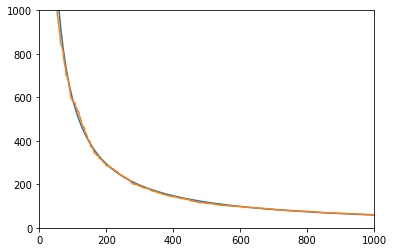

In [176]:
get_plot(global_dict, const = 3)

In [137]:
dict1 = process_without_norm(token)
c = Counter(token)

# Части речи

In [33]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()


In [35]:
tags = [morph.parse(word.decode("utf-8"))[0].tag for word in words]

In [74]:
pos = [tag.POS for tag in tags if tag.POS != None]

In [95]:
pos_counter = Counter(pos)
print pos_counter.most_common(20)

 [(u'NOUN', 130266), (u'VERB', 76653), (u'CONJ', 51747), (u'ADJF', 50534), (u'PREP', 47341), (u'NPRO', 42257), (u'ADVB', 36001), (u'PRCL', 28905), (u'INFN', 12015), (u'ADJS', 5064), (u'GRND', 4711), (u'PRTF', 4676), (u'PRED', 3083), (u'NUMR', 3047), (u'INTJ', 1932), (u'COMP', 1761), (u'PRTS', 1408)]


In [98]:
res = open("./pos.txt", 'wb+')
summ = 0
for key in pos_counter.keys():
    res.write(key)
    res.write("\t")
    res.write(str(pos_counter[key]))
    res.write("\n")
    summ += pos_counter[key]

In [99]:
for key in pos_counter.keys():
    print key, float(pos_counter[key])/summ

INFN 0.0239628560773
NOUN 0.25980402911
NUMR 0.00607697232355
INTJ 0.00385320332429
PRCL 0.0576484689899
PRED 0.00614877114326
ADJS 0.0100997006388
ADVB 0.0718008141188
GRND 0.00939567332335
VERB 0.152877636862
PRTF 0.0093258689153
COMP 0.00351215893068
CONJ 0.103204820094
ADJF 0.100785598752
PREP 0.0944174423266
PRTS 0.00280813161521
NPRO 0.0842778534546


# Время

In [57]:
tence_count = Counter([tag.tense for tag in tags if tag.tense != None])
tence_count.most_common(3)

[(u'past', 57867), (u'pres', 22246), (u'futr', 6175)]

In [88]:
res = open("./tense.txt", 'wb+')
summ = 0
for key in tence_count.keys():
    res.write(key)
    res.write("\t")
    res.write(str(tence_count[key]))
    res.write("\n")
    summ += tence_count[key]

In [90]:
for key in tence_count.keys():
    print key, float(tence_count[key])/summ

past 0.670626274801
futr 0.0715626738365
pres 0.257811051363


# Падеж

In [63]:
case_count = Counter([tag.case for tag in tags if tag.case != None])
case_count.most_common(10)

[(u'nomn', 102014),
 (u'gent', 55867),
 (u'accs', 27102),
 (u'ablt', 18503),
 (u'datv', 14428),
 (u'loct', 12097),
 (u'loc2', 505),
 (u'gen2', 163),
 (u'voct', 101)]

In [101]:
res = open("./case.txt", 'wb+')
summ = 0
for key in case_count.keys():
    res.write(key)
    res.write("\t")
    res.write(str(case_count[key]))
    res.write("\n")
    summ += case_count[key]

In [102]:
for key in case_count.keys():
    print key, float(case_count[key])/summ

gen2 0.000706300372649
gent 0.242079036312
datv 0.0625184158073
nomn 0.442040038132
loc2 0.00218823121588
loct 0.0524178871653
voct 0.000437646243175
ablt 0.0801759251235
accs 0.117436519629


# Залог

In [65]:
voice = Counter([tag.voice for tag in tags if tag.voice != None])
voice.most_common(2)

[(u'pssv', 3689), (u'actv', 2395)]

In [103]:
res = open("./voice.txt", 'wb+')
summ = 0
for key in voice.keys():
    res.write(key)
    res.write("\t")
    res.write(str(voice[key]))
    res.write("\n")
    summ += voice[key]

In [104]:
for key in voice.keys():
    print key, float(voice[key])/summ

pssv 0.606344510191
actv 0.393655489809


# Трудно быть богом

In [84]:
dict_god = get_top(u"Трудно быть богом.txt", 10)

И 1879
В 1143
НЕ 919
ОН 806
НА 768
ЧТО 702
РУМАТ 698
Я 684
ОНО 622
ДОН 578


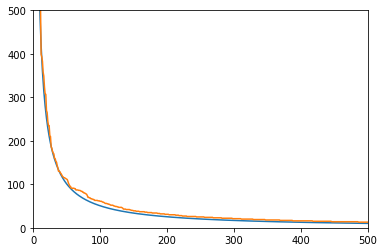

In [152]:
get_plot(dict_god, 500, 500, const = 2.7)

# Волны гасят ветер

In [89]:
dict_ww = get_top(u"Волны гасят ветер.txt", 10)

И 1263
В 990
НЕ 979
Я 790
ЧТО 699
НА 546
ЭТО 488
ОНО 482
С 444
ОН 433


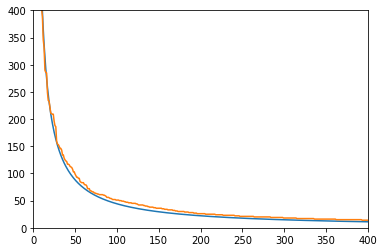

In [162]:
get_plot(dict_ww, 400, 400, const = 3.5)

# Сказка о тройке

In [91]:
dict_3 = get_top(u'Сказка о тройке.txt', 10)

И 1852
В 1011
НЕ 913
Я 881
ЧТО 809
НА 698
ОН 629
ОНО 547
ЭТО 481
С 481


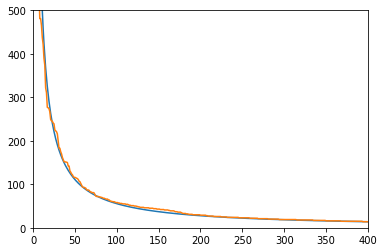

In [164]:
get_plot(dict_3, 400, 500, 3)

# Понедельник называется в субботу

In [93]:
dict_mond = get_top(u'Понедельник начинается в субботу.txt', 10)

И 2267
Я 1698
В 1480
НЕ 1017
НА 868
ЧТО 852
СКАЗАТЬ 780
С 691
ОН 629
ЭТО 547


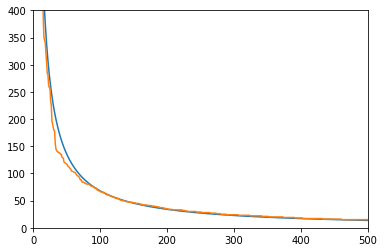

In [165]:
get_plot(dict_mond, 500, 400, 3)

# Обитаемый остров

In [95]:
dict_il = get_top(u'Обитаемый остров.txt', 10)

И 3785
НЕ 2096
В 1921
ОН 1527
НА 1483
ЧТО 1467
ОНО 1181
ЭТО 1009
МАКСИМ 1001
ВЕСЬ 951


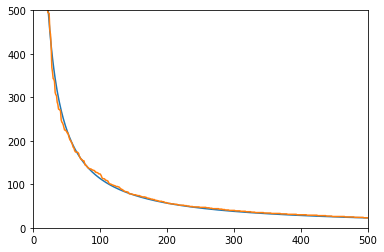

In [166]:
get_plot(dict_il, 500, 500, 3)

# Путь на Амальтею

In [97]:
dict_amalt = get_top(u'Путь на Амальтею.txt', 10)

И 825
В 463
СКАЗАТЬ 450
НА 404
ОН 383
НЕ 299
ЧТО 249
ДАУГ 189
Я 187
ЭТО 180


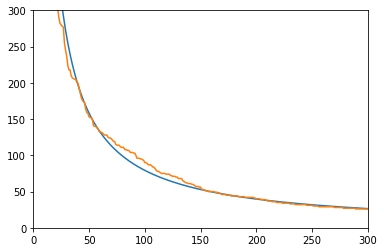

In [167]:
get_plot(dict_amalt, 300, 300, 3)

# Стажеры

In [100]:
dict_st = get_top(u'Стажеры.txt', 10)

И 2121
В 1218
СКАЗАТЬ 1184
НЕ 1132
НА 1023
ОН 989
ЧТО 985
Я 984
ЭТО 636
ОНО 598


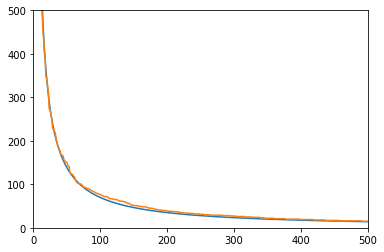

In [170]:
get_plot(dict_st, 500, 500, 3.3)

# Попытка к бегству

In [102]:
dict_run = get_top(u'Попытка к бегству.txt', 10)

И 1089
В 609
НА 597
ОН 595
НЕ 543
ВАДИМА 440
СКАЗАТЬ 424
АНТОН 420
САУЛ 396
ЧТО 387


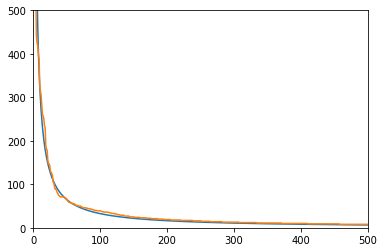

In [173]:
get_plot(dict_run, 500, 500, 3)

# Улитка на склоне

In [104]:
dict_amalt = get_top(u'Улитка на склоне.txt', 10)

И 2644
НЕ 1676
В 1248
Я 1085
ЧТО 1064
НА 951
А 912
ОН 868
ТЫ 737
ЭТО 698


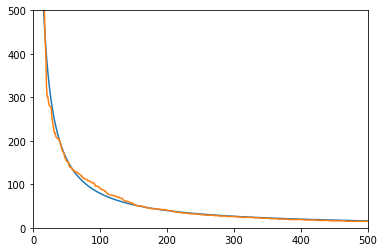

In [174]:
get_plot(dict_amalt, 500, 500, 3)

# Пикник на обочине

In [115]:
dict_pic = get_top(u'Пикник на обочине.txt', 10)

И 1901
НЕ 1050
В 1031
ОН 833
НА 788
Я 778
ЧТО 717
ОНО 634
А 574
ВЕСЬ 536


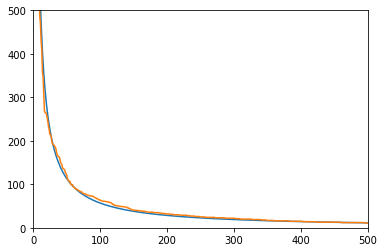

In [175]:
get_plot(dict_pic, 500, 500, 3)